## Data Attributes
- id = Unique ID
- diagnosis = Target: M - Malignant B - Benign
- radius_mean = Radius of Lobes
- texture_mean = Mean of Surface Texture
- perimeter_mean = Outer Perimeter of Lobes
- area_mean = Mean Area of Lobes
- smoothness_mean = Mean of Smoothness Levels
- compactness_mean = Mean of Compactness
- concavity_mean = Mean of Concavity
- concave points_mean = Mean of Cocave Points
- symmetry_mean = Mean of Symmetry
- fractal_dimension_mean = Mean of Fractal Dimension
- radius_se = SE of Radius
- texture_se = SE of Texture
- perimeter_se = Perimeter of SE
- area_se = Are of SE
- smoothness_se = SE of Smoothness
- compactness_se = SE of compactness
- concavity_se = SEE of concavity
- concave points_se = SE of concave points
- symmetry_se = SE of symmetry
- fractal_dimension_se = SE of Fractal Dimension
- radius_worst = Worst Radius
- texture_worst = Worst Texture
- perimeter_worst = Worst Permimeter
- area_worst = Worst Area
- smoothness_worst = Worst Smoothness
- compactness_worst = Worse Compactness
- concavity_worst = Worst Concavity
- concave points_worst = Worst Concave Points
- symmetry_worst = Worst Symmetry
- fractal_dimension_worst = Worst Fractal Dimension

Data Source (Kaggle): https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset


## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Load and View the data

In [2]:
bc_data = pd.read_csv('data/breast-cancer.csv')
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Inspection

In [3]:
# Check the shape of the dataset (number of rows and columns)
bc_data.shape

(569, 32)

In [4]:
# Display information about the dataset including data types and non-null values
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Check for missing values in the dataset
bc_data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
# Generate descriptive statistics of the dataset
bc_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Exploratory Data Analysis (EDA) and Visualization

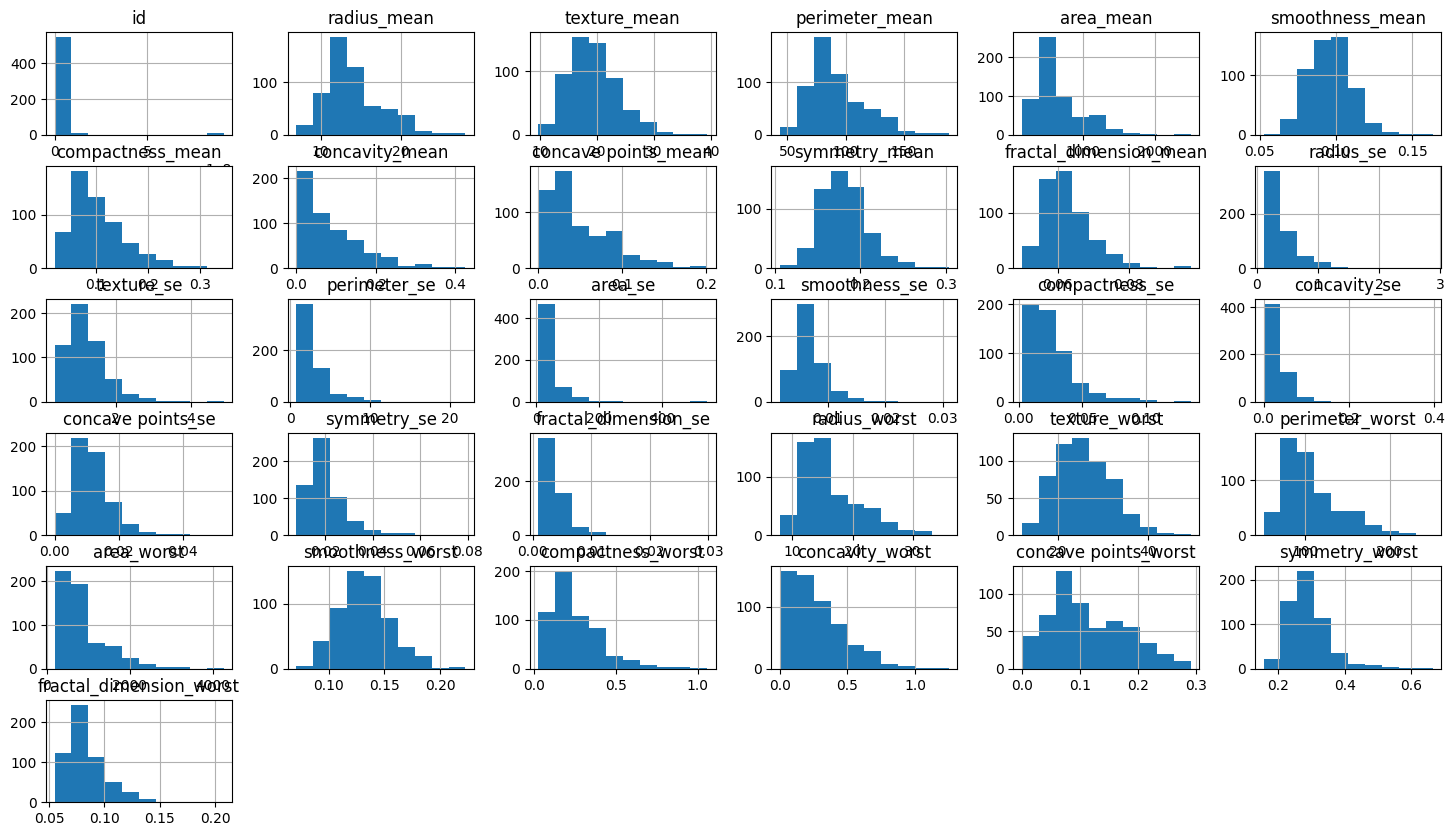

In [9]:
bc_data.hist(figsize=(18,10))
plt.show()

## Feature Selection

In [16]:
# Separate features (X) and target variable (y)v
X = bc_data.drop(['id', 'diagnosis'], axis=1)
y = bc_data['diagnosis']

## Encoding Categorical Variables

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [41]:
# Encode the 'diagnosis' categorical variable
label_encoder = LabelEncoder()
bc_data['diagnosis'] = label_encoder.fit_transform(bc_data['diagnosis'])


In [42]:
label_encoder.classes_

array([0, 1])

## Exploratory Data Analysis (EDA) and Visualization

In [43]:
# Calculate the correlation matrix of the dataset
corr = bc_data.corr()
corr 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


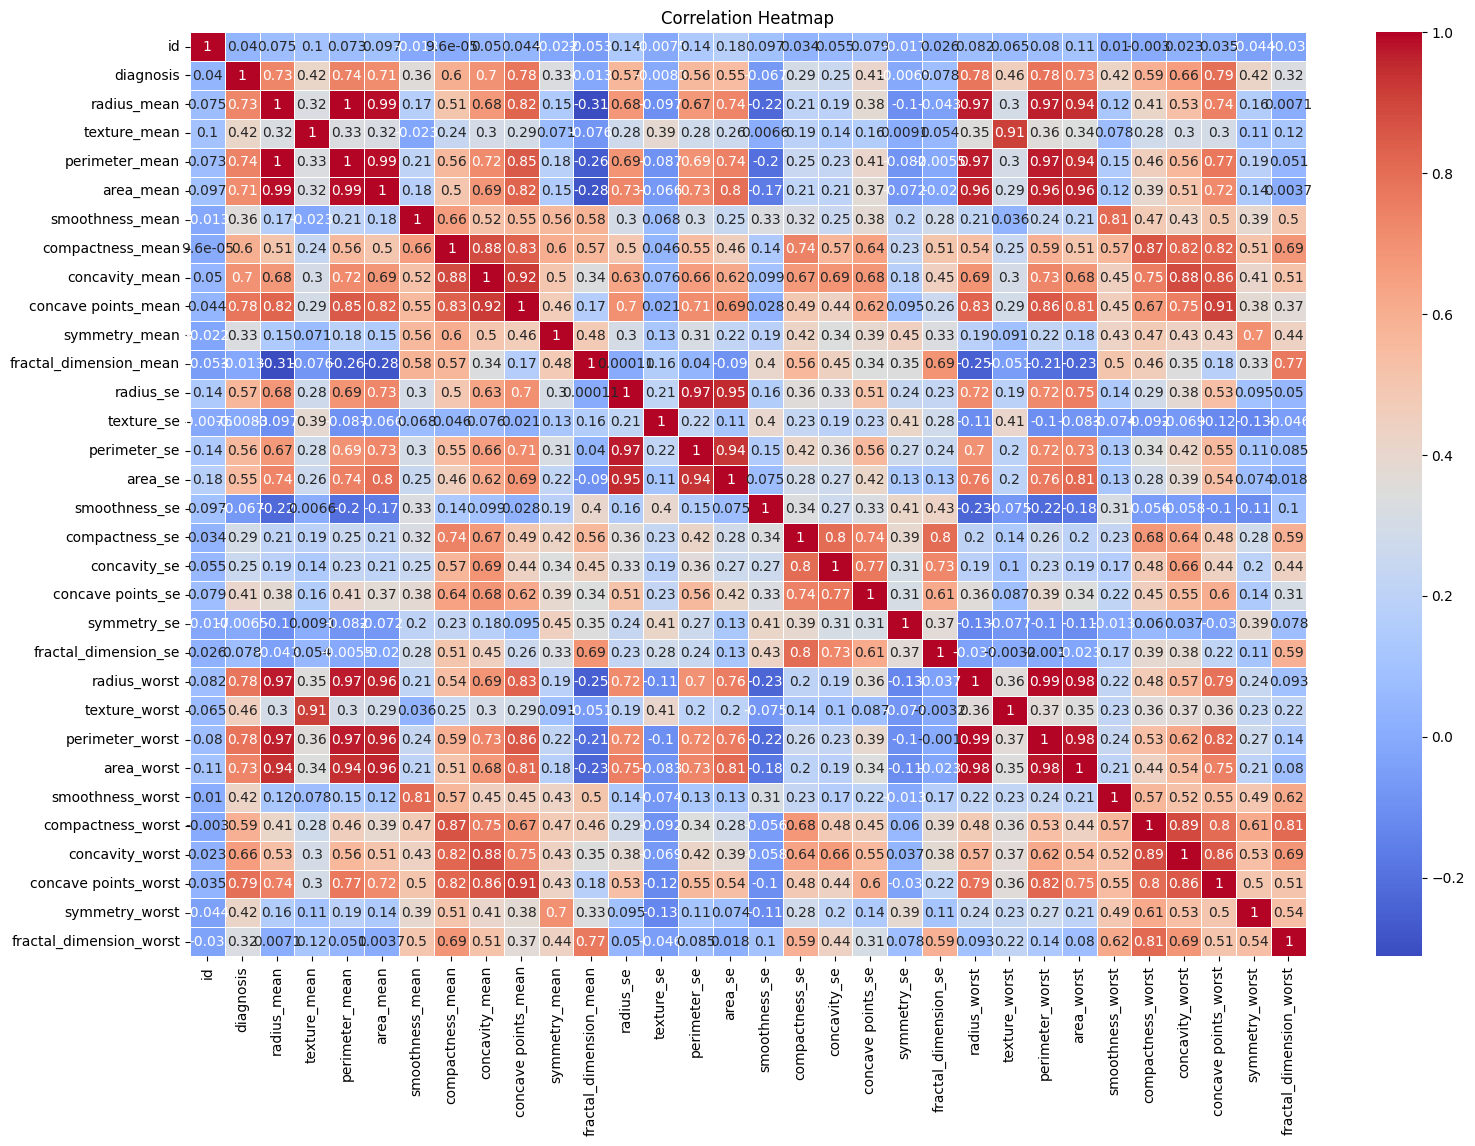

In [44]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Feature scaling

In [45]:
# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

In [46]:
# Scale the selected columns
columns_to_scale = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [47]:
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [48]:
# Count the number of occurrences of each class in the target variable
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## TRAIN | TEST SPLIT

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=42)

In [51]:
print('Training Cases: %d\nTest Cases: %d' %(X_train.shape[0], X_test.shape[0]))

Training Cases: 455
Test Cases: 114


## Building the Model

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc

In [53]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

Accuracy:  0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        71
   Malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



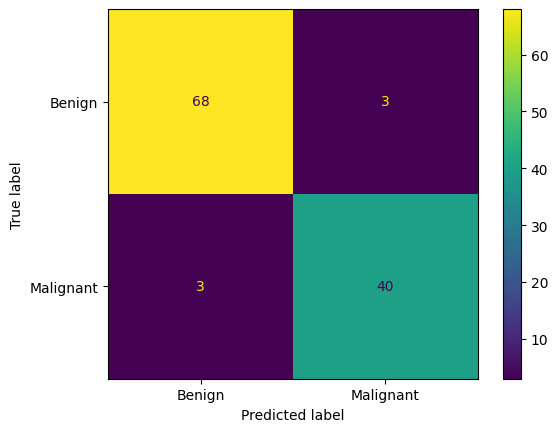

In [54]:
# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# Print classification report
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

# Print confusion matrix
conf_mtx = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtx, display_labels=['Benign', 'Malignant'])
disp.plot()
plt.show()

## Feature Importance

                Features  Importance
7    concave points_mean    0.691420
27  concave points_worst    0.065651
1           texture_mean    0.058478
20          radius_worst    0.052299
22       perimeter_worst    0.051494
19  fractal_dimension_se    0.018554
21         texture_worst    0.017445
17     concave points_se    0.015931
13               area_se    0.011983
24      smoothness_worst    0.009233
16          concavity_se    0.006276
14         smoothness_se    0.001237
2         perimeter_mean    0.000000
3              area_mean    0.000000
12          perimeter_se    0.000000


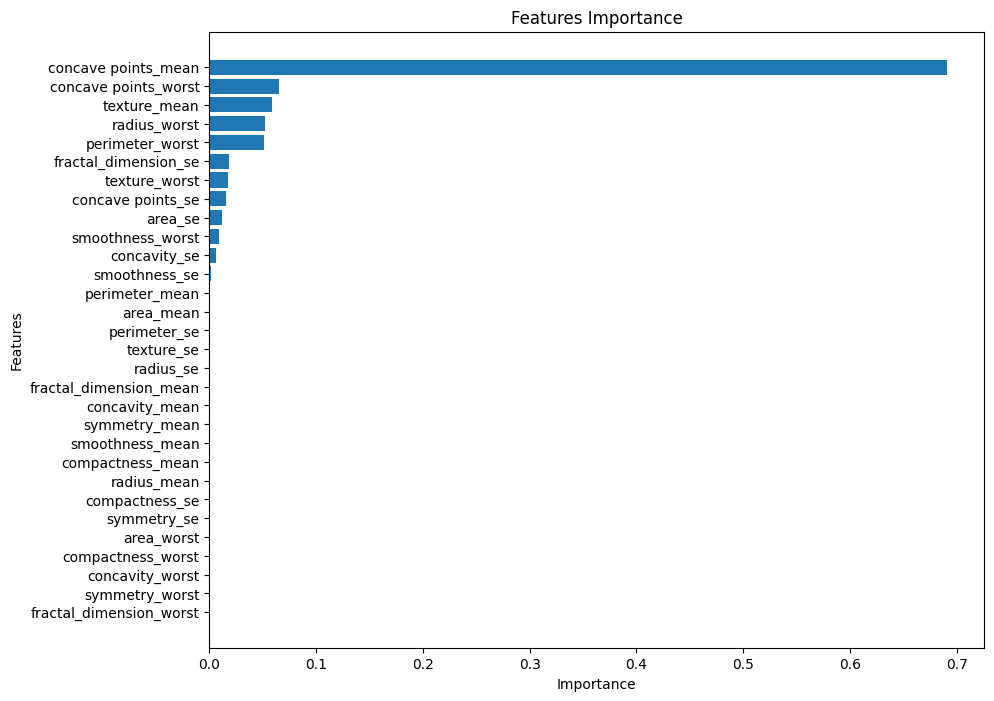

In [56]:
# Get the feature importance
importance = clf.feature_importances_
feature_names = X.columns

# Create a Dataframe for clear visualiztion
feature_importance_df = pd.DataFrame({
    'Features': feature_names,
    'Importance': importance    
})

# Ensure data is sorted
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display features
print(feature_importance_df.head(15))

# Plot the feature importance
plt.figure(figsize=(10,8))
plt.barh(feature_importance_df['Features'], feature_importance_df['Importance'])
plt.title('Features Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()